## 10.1
Code up the PCA algorithm

In [12]:
import numpy as np
import numpy.linalg as la
from matplotlib import pyplot as plt

In [54]:
class PCA():
    def fit(self, X,s=None):
        _,S,VT = la.svd(X,full_matrices=False)
        self.V = VT.T[:,:s]
        self.var = S[:s]
        return self
    
    
    def transform(self, X):
        return X @ self.V
        
    def project(self,X):
        A = self.transform(X)
        return A @ self.V.T
        
        

## 10.2 
Consider the datasets.

In [38]:
from sklearn.datasets import load_iris, load_breast_cancer, fetch_openml

In [39]:
iris = load_iris()
breast_cancer = load_breast_cancer()
fashion_mnist = fetch_openml(name="Fashion-MNIST", data_home="data/")

In [46]:
print(iris.DESCR) # All numeric attributes
print(breast_cancer.DESCR) # All numeric attributes
print(fashion_mnist.DESCR) # All numeric (pixel intensity)

.. _iris_dataset:

Iris plants dataset
--------------------

**Data Set Characteristics:**

    :Number of Instances: 150 (50 in each of three classes)
    :Number of Attributes: 4 numeric, predictive attributes and the class
    :Attribute Information:
        - sepal length in cm
        - sepal width in cm
        - petal length in cm
        - petal width in cm
        - class:
                - Iris-Setosa
                - Iris-Versicolour
                - Iris-Virginica
                
    :Summary Statistics:

    ============== ==== ==== ======= ===== ====================
                    Min  Max   Mean    SD   Class Correlation
    ============== ==== ==== ======= ===== ====================
    sepal length:   4.3  7.9   5.84   0.83    0.7826
    sepal width:    2.0  4.4   3.05   0.43   -0.4194
    petal length:   1.0  6.9   3.76   1.76    0.9490  (high!)
    petal width:    0.1  2.5   1.20   0.76    0.9565  (high!)
    ============== ==== ==== ======= ===== ===========

For Iris and Breast Cancer datasets, it makes sense to mean-center the data, but for the Fashion-MNIST dataset it makes more sense to maintain the inherent structure and not scale each individual pixel by its mean amount. This will preserve some consistency across neighboring pixel values, which is a big deal in image data like this. 

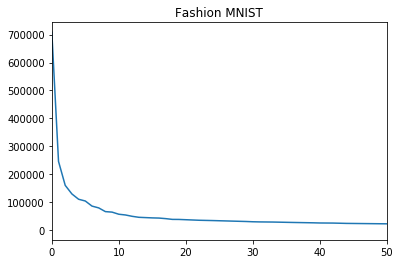

In [63]:
X_iris = iris.data
X_iris = X_iris - X_iris.mean(axis=0)
y_iris = iris.target

X_breast_cancer = breast_cancer.data
X_breast_cancer = X_breast_cancer - X_breast_cancer.mean(axis=0)
y_breast_cancer = breast_cancer.target

X_mnist = fashion_mnist.data
y_mnist = fashion_mnist.target
y_mnist = y_mnist.astype(int)

pca = PCA()
pca.fit(X_iris)
plt.plot(pca.var)
plt.title("Iris")
plt.show()

pca.fit(X_breast_cancer)
plt.plot(pca.var)
plt.title("Breast Cancer")
plt.xlim(0,5)
plt.show()

pca.fit(X_mnist)
plt.plot(pca.var)
plt.title("Fashion MNIST")
plt.xlim(0,50)
plt.show()


For Iris: Most of the variance is explained by the first two principal components

For Breast Cancer: Same as Iris, most is explained in the first two principal components

For Fashion MNIST: It seems that most of the variance is explained in the first 10 (probably even less)



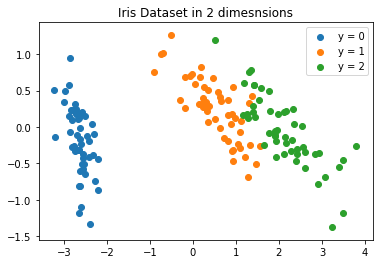

In [71]:
# SEPARATE Using PCA(2)
A_iris = pca.fit(X_iris,2).transform(X_iris)

for y in np.unique(y_iris):
    plt.scatter(*A_iris[y_iris == y].T,label="y = {}".format(y))
plt.title("Iris Dataset in 2 dimesnsions")
plt.legend()
plt.show()

Here, it seemed to do a decent job of separating the data except perhaps along the green-orange boundary

In [76]:
A_breast_cancer = pca.fit(X_breast_cancer,2).transform(X_breast_cancer)

for y in np.unique(y_breast_cancer):
    plt.scatter(*A_breast_cancer[y_breast_cancer == y].T, alpha=.5, label="y = {}".format(y))
plt.title("Breast Cancer Dataset in 2 Dimensions")
plt.legend()
plt.show()

Again, it seems that PCA did a decent job of maintaining each group down to two dimensions

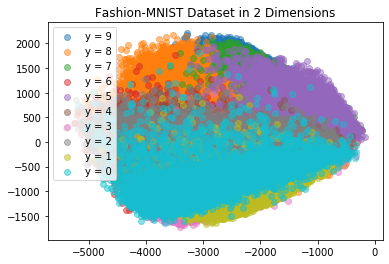

In [80]:
A_mnist = pca.fit(X_mnist,2).transform(X_mnist)

for y in reversed(np.unique(y_mnist)):
    plt.scatter(*A_mnist[y_mnist == y].T, alpha=.5, label="y = {}".format(y))
plt.title("Fashion-MNIST Dataset in 2 Dimensions")
plt.legend()
plt.show()

This time, it looks like 2 dimensions was not enough to maintain distinct groupings in so few dimensions given so many possible output classes

(FASHION MINST FIND 90% VARIANCE)

In [95]:
pca.fit(X_mnist)
var_sum = pca.var.sum()
percents = pca.var / var_sum
p = 0
i = 0
while p < .9:
    p += percents[i]
    i += 1

print("s = {} maintains {}% variance".format(i,p * 100))



s = 497 maintains 90.03006870148282% variance


In [96]:
projected_mnist = pca.fit(X_mnist,i).project(X_mnist)

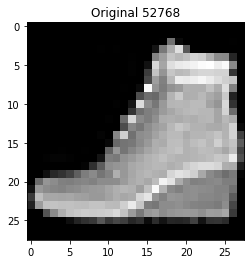

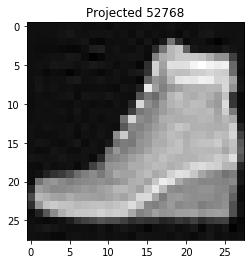

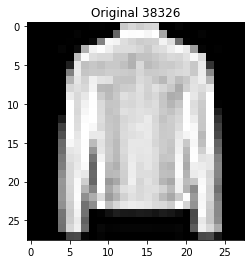

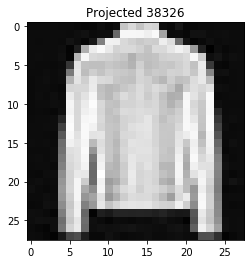

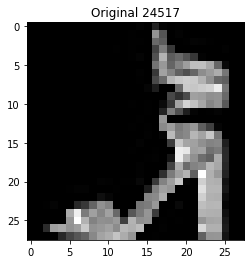

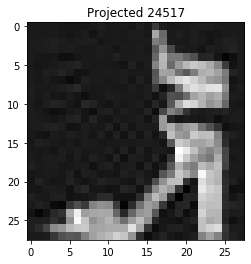

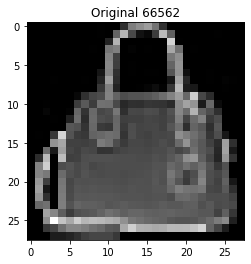

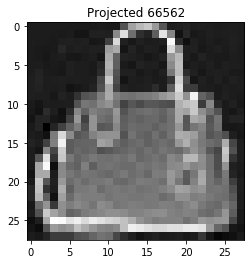

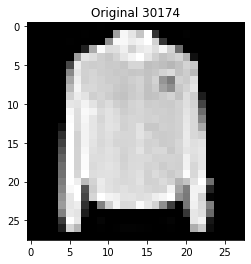

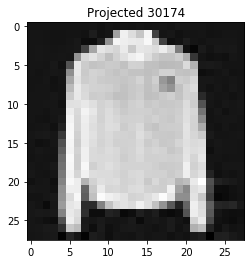

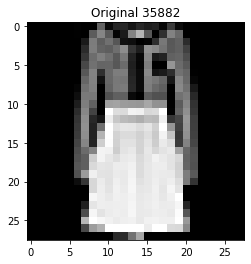

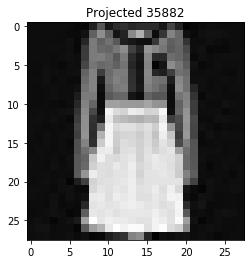

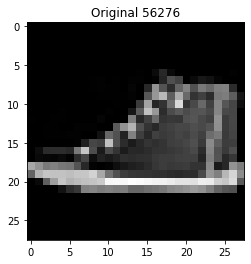

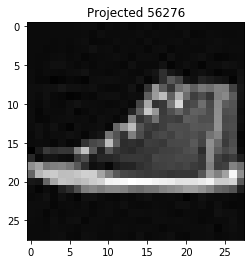

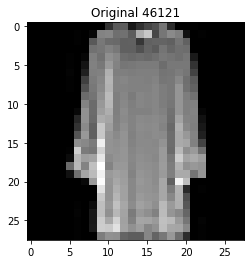

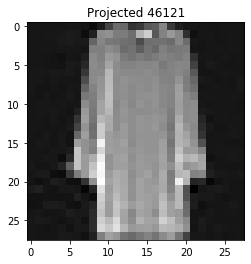

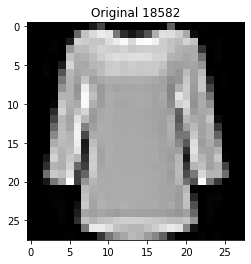

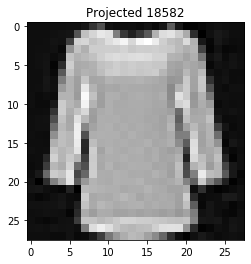

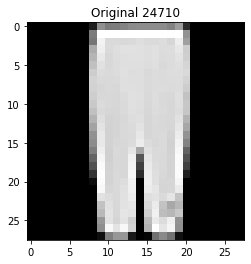

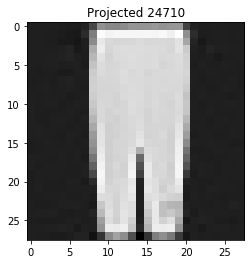

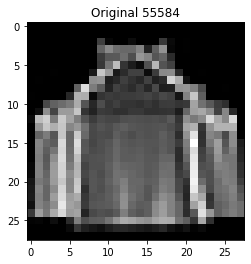

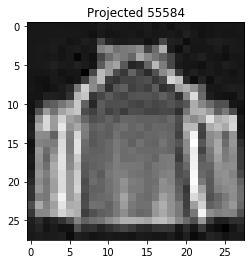

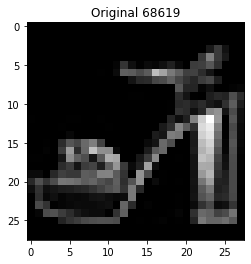

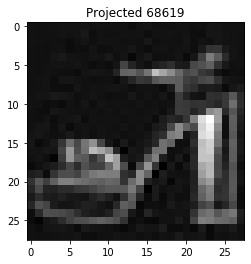

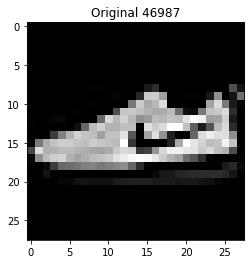

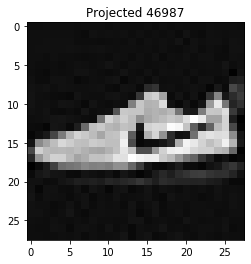

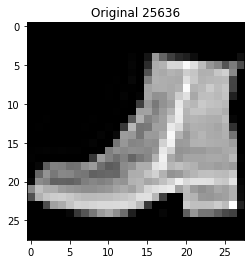

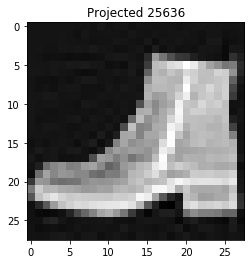

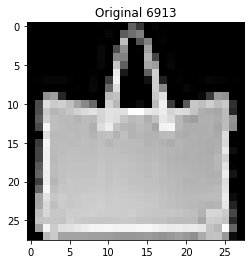

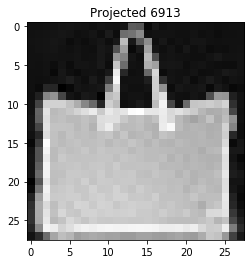

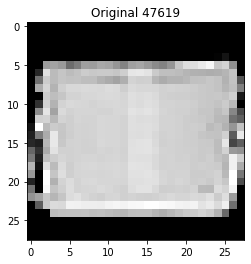

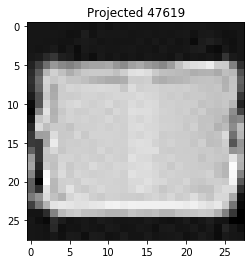

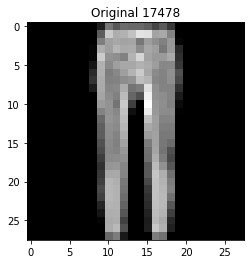

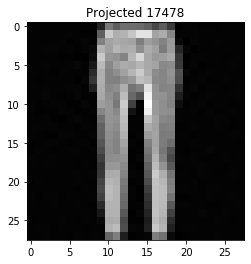

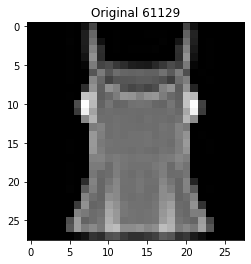

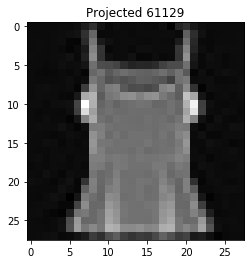

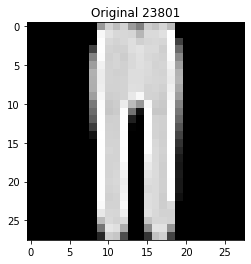

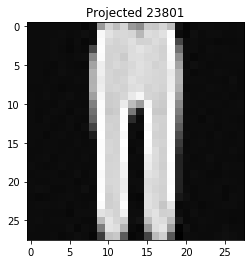

In [98]:
# Plot 20 random
indices = np.random.randint(0,len(X_mnist),20)
for j in indices:
    plt.imshow(X_mnist[j].reshape(28,28),cmap='gray')
    plt.title("Original {}".format(j))
    plt.show()
    
    plt.imshow(projected_mnist[j].reshape(28,28),cmap='gray')
    plt.title("Projected {}".format(j))
    plt.show()

## 10.4
Add gaussian noise to mnist



In [104]:
gauss_mnist = X_mnist + np.random.randn(*X_mnist.shape)

In [105]:
pca.fit(gauss_mnist)
var_sum = pca.var.sum()
percents = pca.var / var_sum
p = 0
i = 0
while p < .9:
    p += percents[i]
    i += 1

print("s = {} maintains {}% variance".format(i,p * 100))

s = 498 maintains 90.02005774966214% variance


In [106]:
projected_mnist = pca.fit(gauss_mnist,i).project(gauss_mnist)

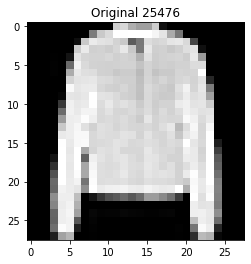

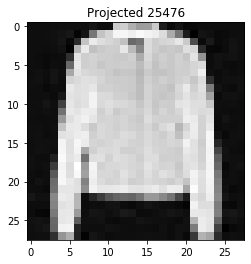

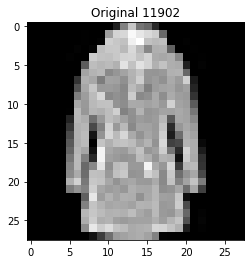

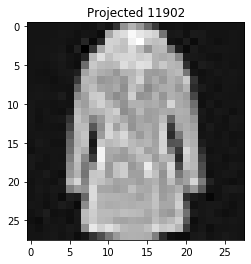

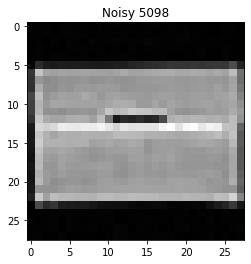

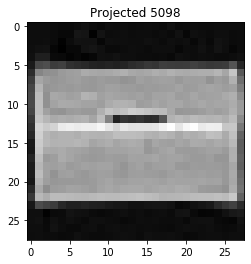

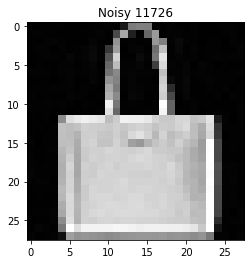

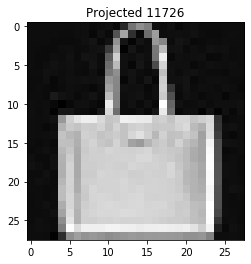

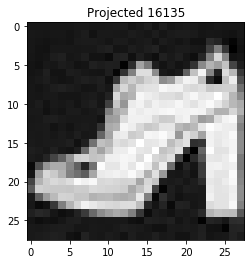

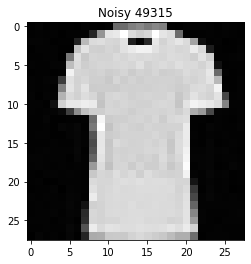

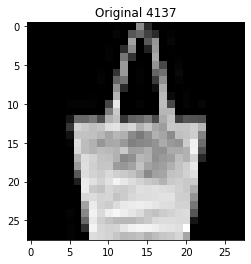

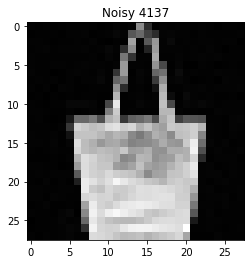

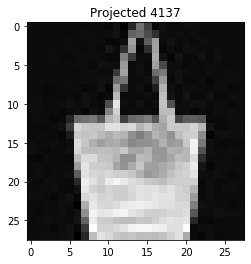

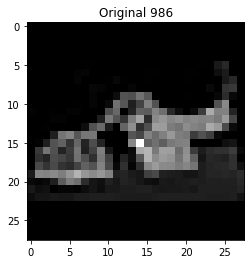

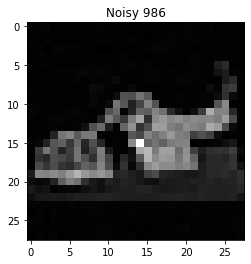

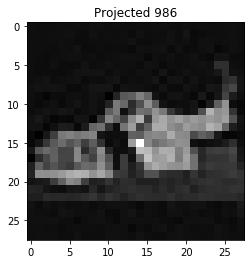

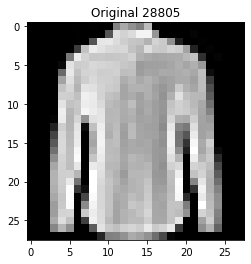

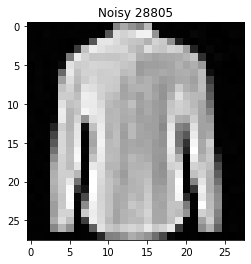

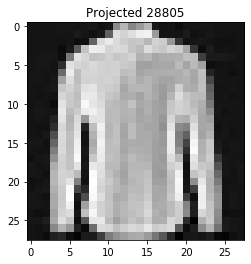

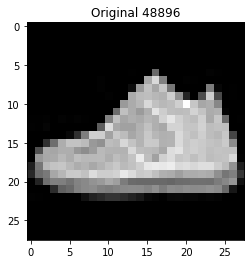

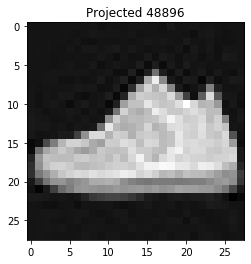

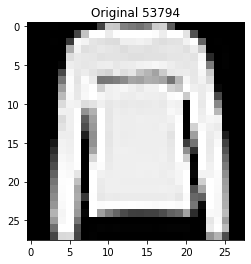

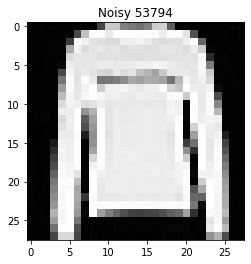

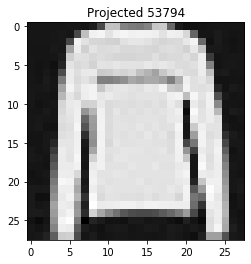

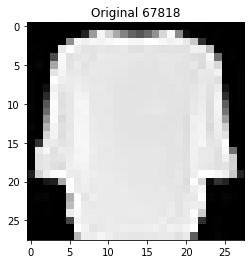

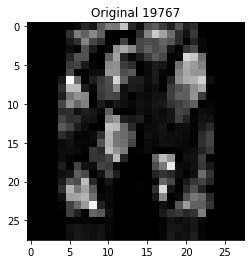

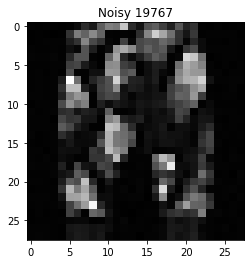

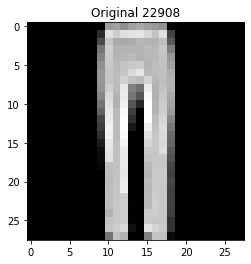

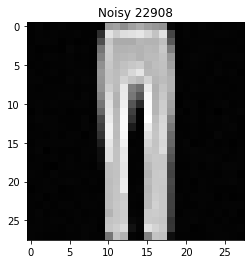

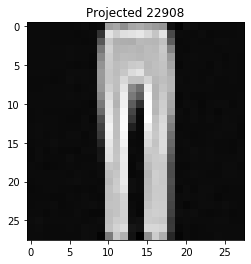

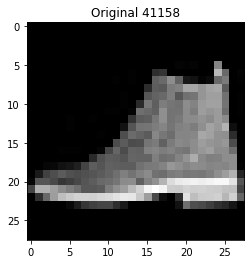

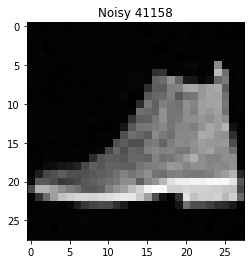

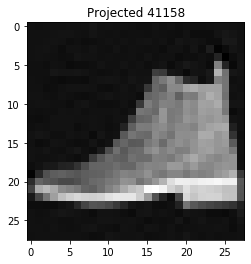

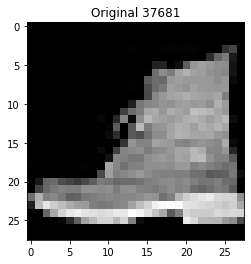

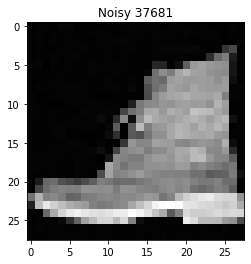

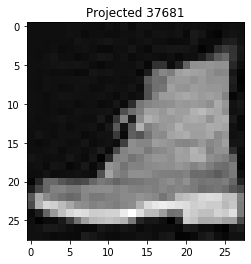

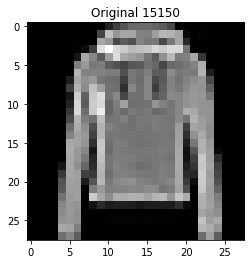

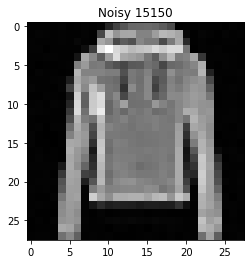

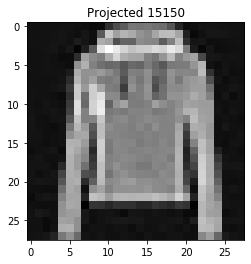

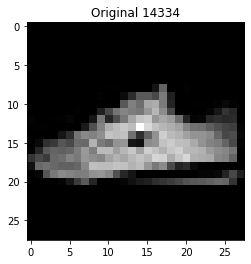

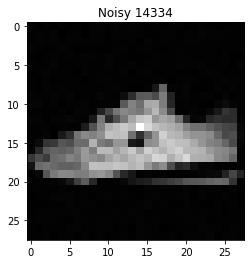

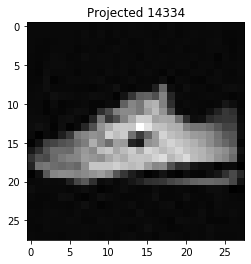

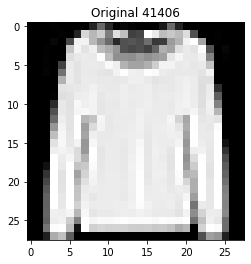

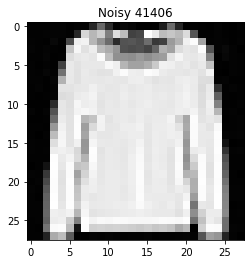

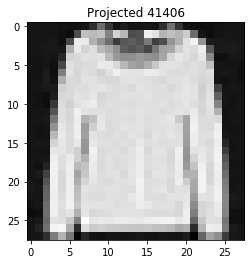

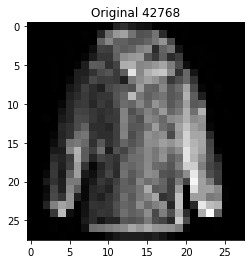

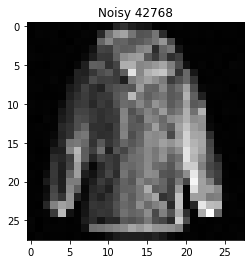

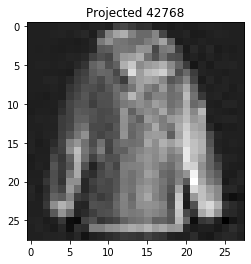

In [107]:
# Plot 20 random
indices = np.random.randint(0,len(gauss_mnist),20)
for j in indices:
    plt.imshow(X_mnist[j].reshape(28,28),cmap='gray')
    plt.title("Original {}".format(j))
    plt.show()
    
    plt.imshow(gauss_mnist[j].reshape(28,28),cmap='gray')
    plt.title("Noisy {}".format(j))
    plt.show()
    
    plt.imshow(projected_mnist[j].reshape(28,28),cmap='gray')
    plt.title("Projected {}".format(j))
    plt.show()

## 10.5
Code up MCA method


In [109]:
def MCA(Z):
    # Calculate pk
    pk = Z.mean(axis=0)
    
    # Calculate X
    X = Z / pk - 1
    return X